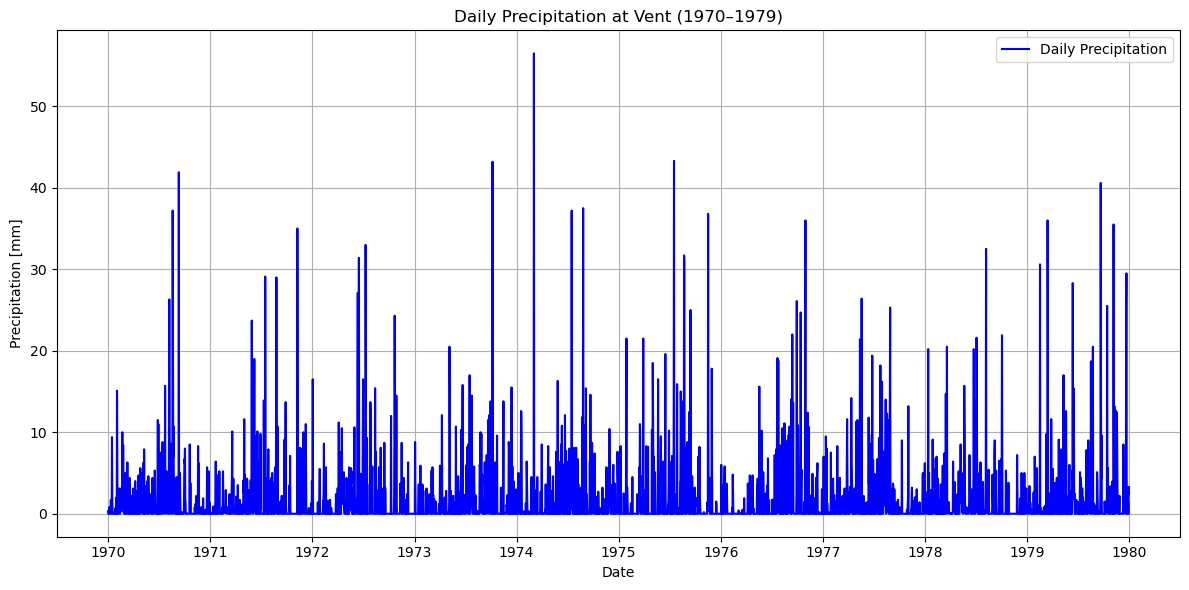

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, skipping metadata lines (assume 26 lines of metadata here — adjust as needed)
df = pd.read_csv("Vent_climate_1935-2016/datasets/Vent_daily_temp_1970-1979.tab", sep="\t", skiprows=18)

# Convert date column to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

# Drop any rows where Date/Time or Precip is missing
df = df.dropna(subset=['Date/Time', 'Precip day total [mm]'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Precip day total [mm]'], label='Daily Precipitation', color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.title('Daily Precipitation at Vent (1970–1979)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def load_tab_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    clean_lines = []
    inside_comment = False
    for line in lines:
        if line.strip().startswith("/*"):
            inside_comment = True
            continue
        if inside_comment and line.strip().endswith("*/"):
            inside_comment = False
            continue
        if not inside_comment:
            clean_lines.append(line)

    for i, line in enumerate(clean_lines):
        if line.lower().startswith("date/time"):
            header_line_idx = i
            break
    else:
        raise ValueError(f"No header line found in {filepath}")

    from io import StringIO
    table_data = "".join(clean_lines[header_line_idx:])
    df = pd.read_csv(StringIO(table_data), sep="\t")
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
    df['source_file'] = os.path.basename(filepath)
    return df

# 🔁 Load all .tab files in Vent_daily_temp_* folders
folder = "./Vent_climate_1935-2016/datasets/Vent_daily_temp_*.tab"
files = glob.glob(folder, recursive=True)
print(f"Found {len(files)} .tab files.")
print(files)



dfs = []
for file in files:
    try:
        df = load_tab_file(file)
        dfs.append(df)
    except Exception as e:
        print(f"⚠️ Could not load {file}: {e}")

# 📚 Combine into one DataFrame
combined = pd.concat(dfs, ignore_index=True)

# 🧼 Keep just what's needed for plotting

print("Columns in combined DataFrame:")
print(combined.columns.tolist())


print(combined.head())
combined.to_csv("Vent_AWS_data_raw.csv", index=False)






Found 10 .tab files.
['./Vent_climate_1935-2016/datasets/Vent_daily_temp_1950-1959.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1960-1969.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_2000-2009.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1970-1979.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1980-1989.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1990-1999.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_2011.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_2010.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1940-1949.tab', './Vent_climate_1935-2016/datasets/Vent_daily_temp_1935-1939.tab']
Columns in combined DataFrame:
['Date/Time', 'Height [m]', 'TxTxTx day max [°C]', 'TnTnTn day min [°C]', 'TTT day m [°C] ((Temperature at 7h + Temperat...)', 'TTT day m [°C] ((Temperature max + Temperatur...)', 'Precip day total [mm]', 'source_file']
   Date/Time  Height [m]  TxTxTx day max [°C]  TnTnTn day min [°C] 

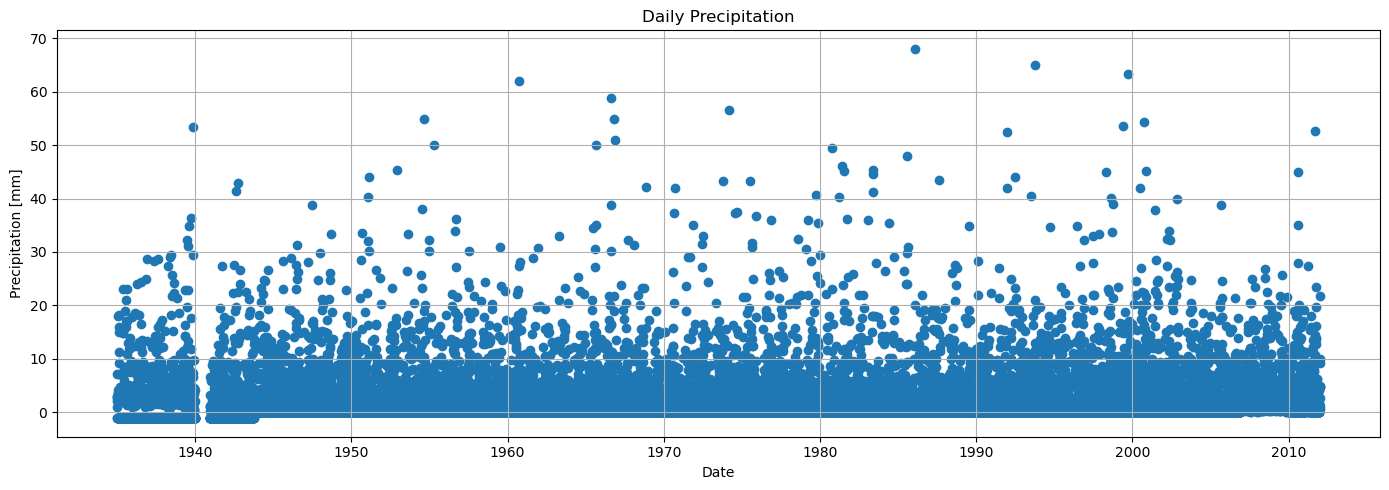

In [6]:
# 📊 Plot daily precipitation
plt.figure(figsize=(14, 5))
plt.scatter(combined['Date/Time'], combined['Precip day total [mm]'])
plt.title("Daily Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation [mm]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Check for negative precipitation values
negative_precip = combined[combined['Precip day total [mm]'] < 0]

# If there are negative values, show them
if not negative_precip.empty:
    print("Negative precipitation values found:")
    print(negative_precip)
else:
    print("No negative precipitation values.")

Negative precipitation values found:
       Date/Time  Height [m]  TxTxTx day max [°C]  TnTnTn day min [°C]  \
22980 1940-12-01           2                 10.9                -16.8   
22981 1940-12-02           2                 -3.7                -15.9   
22982 1940-12-03           2                 -0.6                 -9.8   
22983 1940-12-04           2                 -5.0                -10.0   
22986 1940-12-07           2                 -4.0                 -9.4   
...          ...         ...                  ...                  ...   
28118 1939-12-26           2                 -2.4                 -9.8   
28119 1939-12-27           2                 -6.2                -13.3   
28121 1939-12-29           2                -15.0                -22.6   
28122 1939-12-30           2                -15.4                -26.3   
28123 1939-12-31           2                 -6.9                -18.8   

       TTT day m [°C] ((Temperature at 7h + Temperat...)  \
22980         

   Date/Time  Height [m]  TxTxTx day max [°C]  TnTnTn day min [°C]  \
0 1950-01-01           2                 -3.8                -11.3   
1 1950-01-02           2                  2.9                 -9.8   
2 1950-01-03           2                  3.0                 -6.7   
3 1950-01-04           2                  0.7                 -6.6   
4 1950-01-05           2                  0.9                 -9.9   

   TTT day m [°C] ((Temperature at 7h + Temperat...)  \
0                                               -8.1   
1                                               -2.8   
2                                               -2.9   
3                                               -2.6   
4                                               -4.0   

   TTT day m [°C] ((Temperature max + Temperatur...)  Precip day total [mm]  \
0                                               -7.6                    0.0   
1                                               -3.5                    9.8   
2    

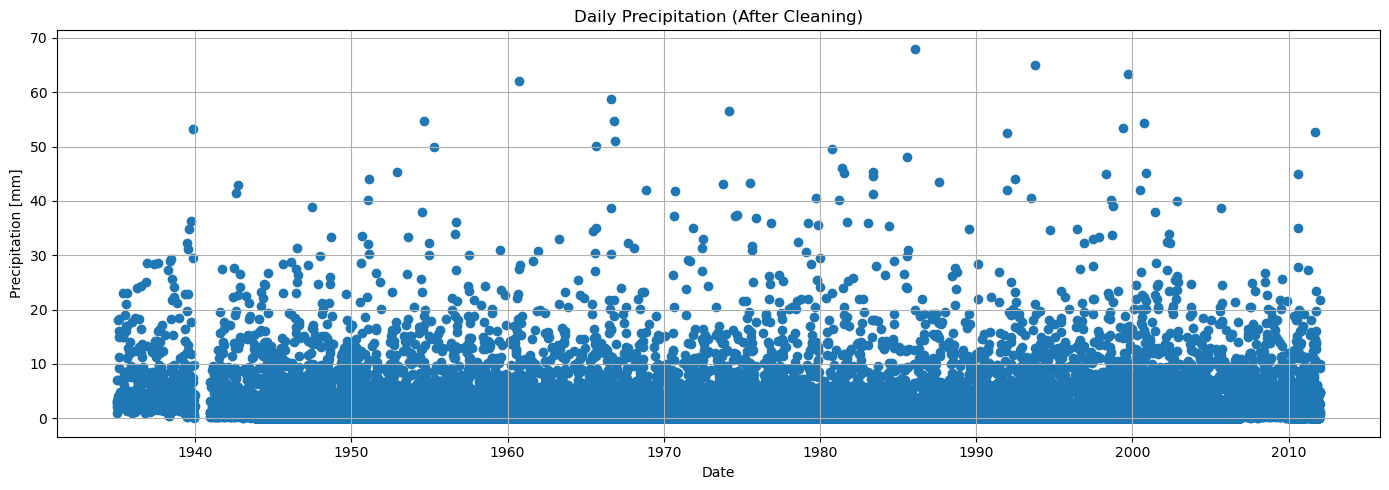

       Date/Time  Height [m]  TxTxTx day max [°C]  TnTnTn day min [°C]  \
0     1950-01-01           2                 -3.8                -11.3   
1     1950-01-02           2                  2.9                 -9.8   
2     1950-01-03           2                  3.0                 -6.7   
3     1950-01-04           2                  0.7                 -6.6   
4     1950-01-05           2                  0.9                 -9.9   
...          ...         ...                  ...                  ...   
28119 1939-12-27           2                 -6.2                -13.3   
28120 1939-12-28           2                 -8.8                -15.0   
28121 1939-12-29           2                -15.0                -22.6   
28122 1939-12-30           2                -15.4                -26.3   
28123 1939-12-31           2                 -6.9                -18.8   

       TTT day m [°C] ((Temperature at 7h + Temperat...)  \
0                                                  

In [13]:
import numpy as np

# Replace negative precipitation values with NaN
combined['precip_cleaned'] = combined['Precip day total [mm]'].apply(lambda x: np.nan if x < 0 else x)

# Check if any negative values have been replaced
print(combined.head())  # Check the first few rows to confirm changes

# Optional: Drop rows with NaN values if needed (e.g., if you want to ignore them in the plot)


# Plot again after cleaning
plt.figure(figsize=(14, 5))
plt.scatter(combined['Date/Time'], combined['precip_cleaned'])
plt.title("Daily Precipitation (After Cleaning)")
plt.xlabel("Date")
plt.ylabel("Precipitation [mm]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure your date column is datetime
combined['Date/Time'] = pd.to_datetime(combined['Date/Time'], errors='coerce')

# Create the hydrological year column
combined['hydrological_year'] = combined['Date/Time'].apply(lambda x: x.year + 1 if x.month >= 9 else x.year)


print(combined)
combined.to_csv("Vent_AWS_data.csv", index=False)
print(combined)
##Strange that one year of data is missing


In [18]:
# Extract the year and month from the 'Date/Time' column
combined['year_month'] = combined['Date/Time'].dt.to_period('M')



## Cleaning precip before this is good so not to add the -1s.
# Group by 'year_month' and sum the precipitation for each month

monthly_totals = combined.groupby('year_month').agg({
    'precip_cleaned': 'sum',
    'hydrological_year': 'first'  # or use 'mean' if needed
}).reset_index()


print(monthly_totals)





    year_month  precip_cleaned  hydrological_year
0      1935-01            26.7               1935
1      1935-02           100.4               1935
2      1935-03            12.3               1935
3      1935-04             0.0               1935
4      1935-05            67.4               1935
..         ...             ...                ...
919    2011-08            57.8               2011
920    2011-09           113.6               2012
921    2011-10           103.5               2012
922    2011-11             6.8               2012
923    2011-12            97.1               2012

[924 rows x 3 columns]


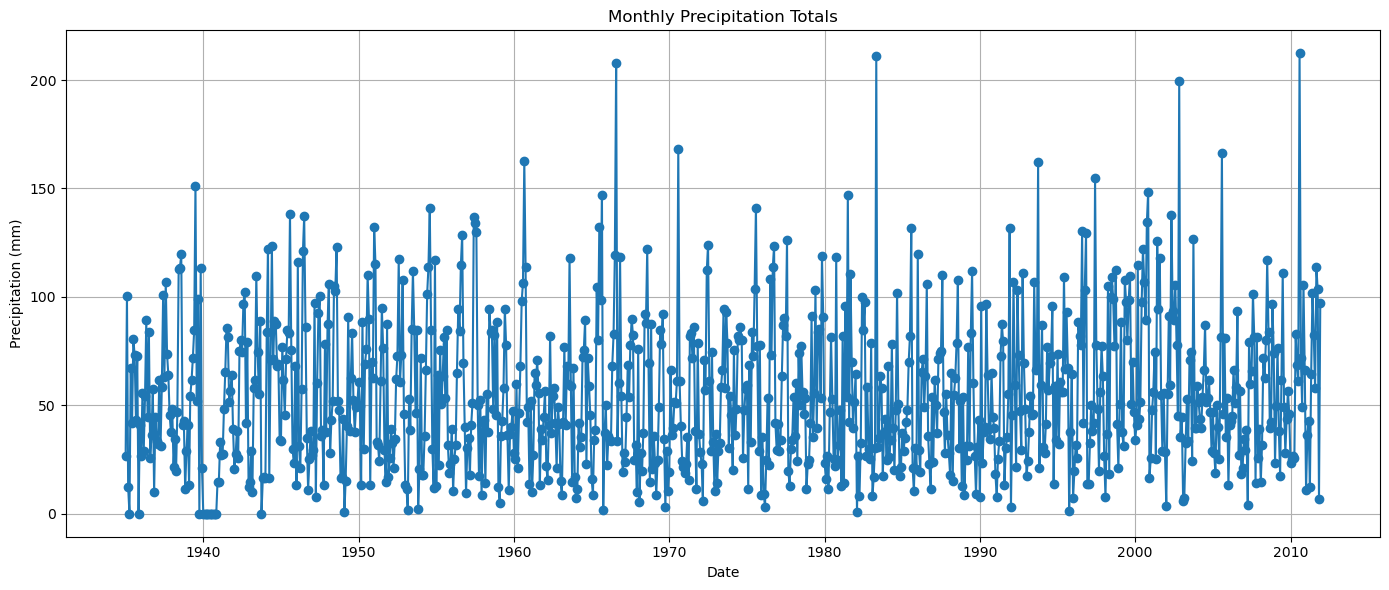

In [19]:
import matplotlib.pyplot as plt

# Convert year_month (Period) to datetime for plotting
monthly_totals['date'] = monthly_totals['year_month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_totals['date'], monthly_totals['precip_cleaned'], marker='o', linestyle='-')

plt.title('Monthly Precipitation Totals')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Load mass balance data (assuming it's already loaded)
df_hef_MB = pd.read_pickle("hef_MB.pkl")

print(df_hef_MB.columns)



print(monthly_totals.head())

Index(['calendar_year', 'hydrological_year', 'mean specific mass balance',
       'climatic mass balance', 'winter mass balance',
       'winter mass balance B06', 'comment B06', 'winter mass balance K99'],
      dtype='object')
  year_month  precip_cleaned  hydrological_year       date
0    1935-01            26.7               1935 1935-01-01
1    1935-02           100.4               1935 1935-02-01
2    1935-03            12.3               1935 1935-03-01
3    1935-04             0.0               1935 1935-04-01
4    1935-05            67.4               1935 1935-05-01


In [21]:
monthly_merged = pd.merge(
    monthly_totals,
    df_hef_MB,
    left_on='hydrological_year',
    right_on='hydrological_year',
    how='inner'
)

monthly_merged = monthly_merged.drop(columns='calendar_year')  # or 'calendar year' if you prefer

monthly_merged.to_csv("test_monthly_merged.csv", index=False)
print(monthly_merged)



    year_month  precip_cleaned  hydrological_year       date  \
0      1953-09            46.4               1954 1953-09-01   
1      1953-10            84.7               1954 1953-10-01   
2      1953-11             2.1               1954 1953-11-01   
3      1953-12            20.4               1954 1953-12-01   
4      1954-01            72.0               1954 1954-01-01   
..         ...             ...                ...        ...   
695    2011-08            57.8               2011 2011-08-01   
696    2011-09           113.6               2012 2011-09-01   
697    2011-10           103.5               2012 2011-10-01   
698    2011-11             6.8               2012 2011-11-01   
699    2011-12            97.1               2012 2011-12-01   

    mean specific mass balance  climatic mass balance  winter mass balance  \
0                         -286                    NaN                  NaN   
1                         -286                    NaN                  NaN 

/tmp/ipykernel_4614/540940689.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['precip_cleaned'] = pd.to_numeric(data['precip_cleaned'], errors='coerce')
/tmp/ipykernel_4614/540940689.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mb_col] = pd.to_numeric(data[mb_col], errors='coerce')


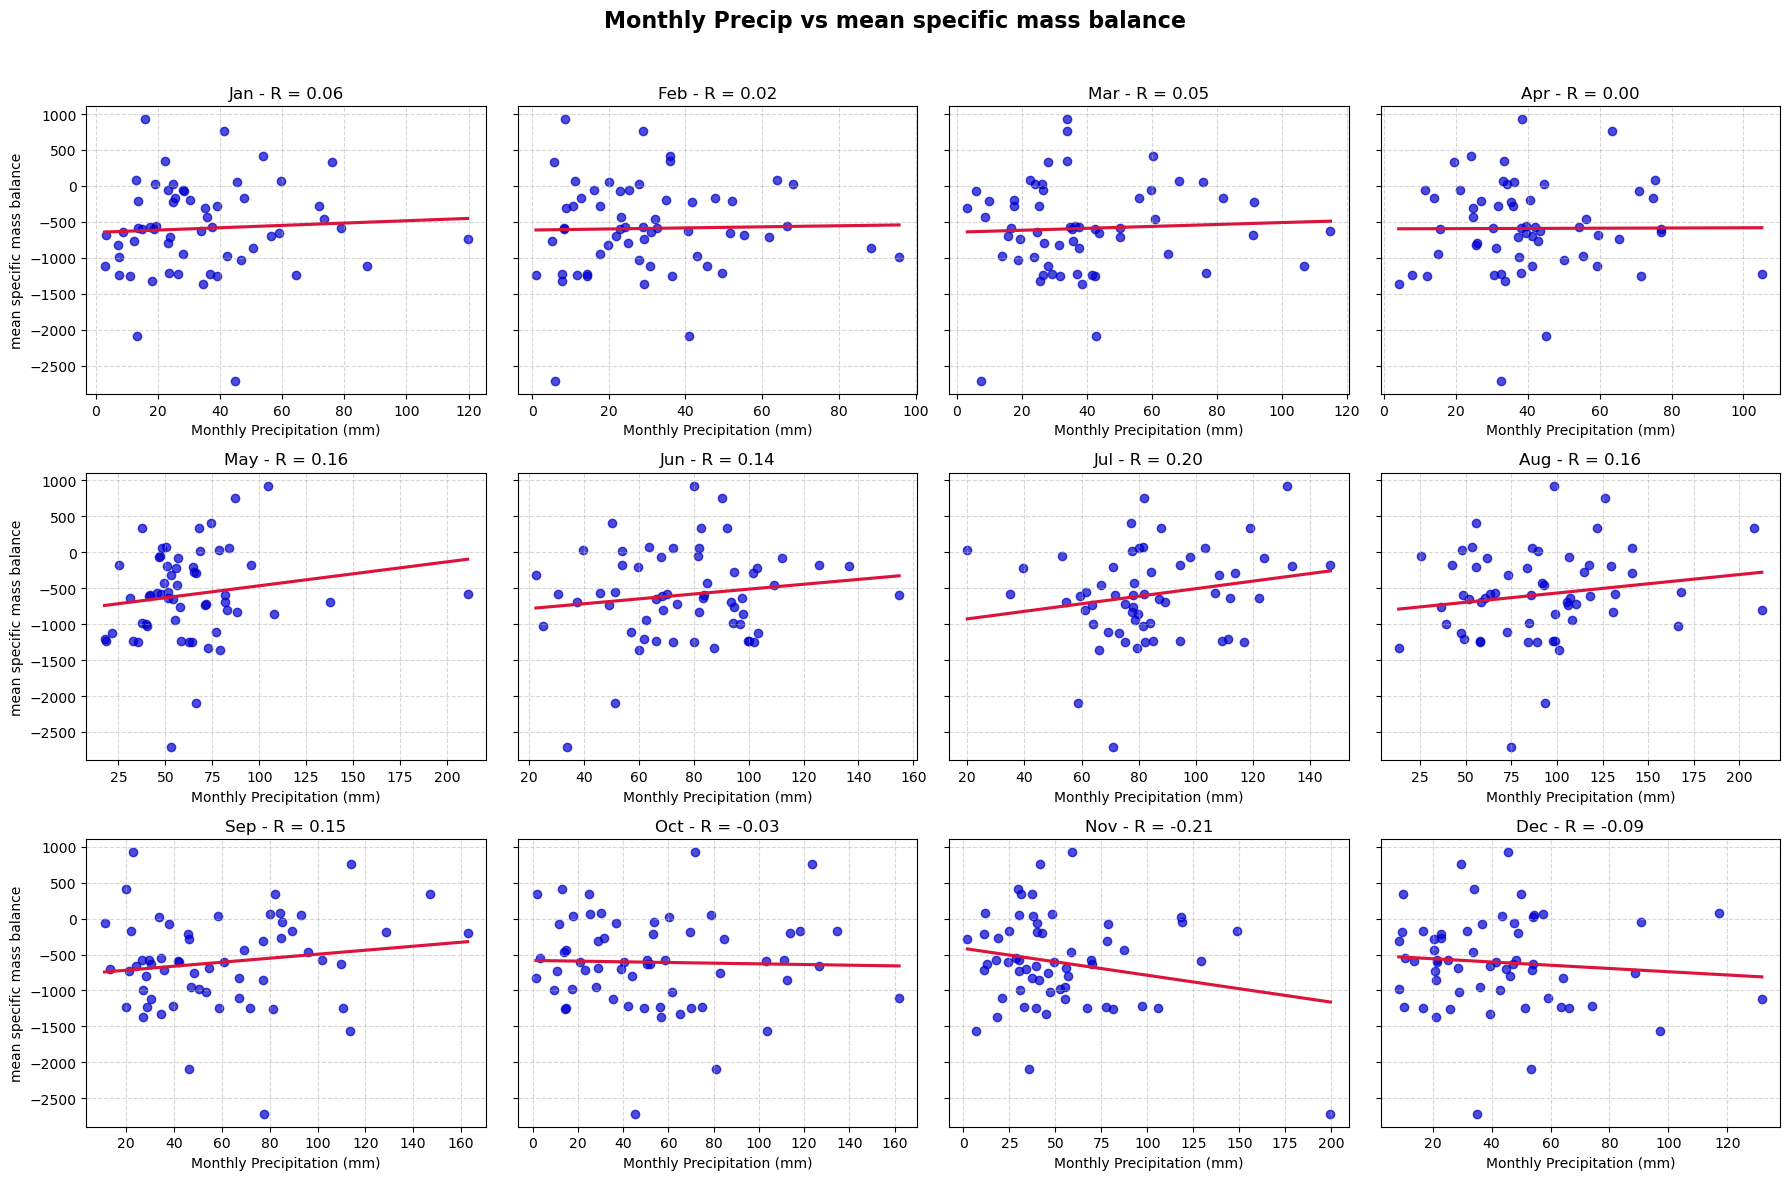

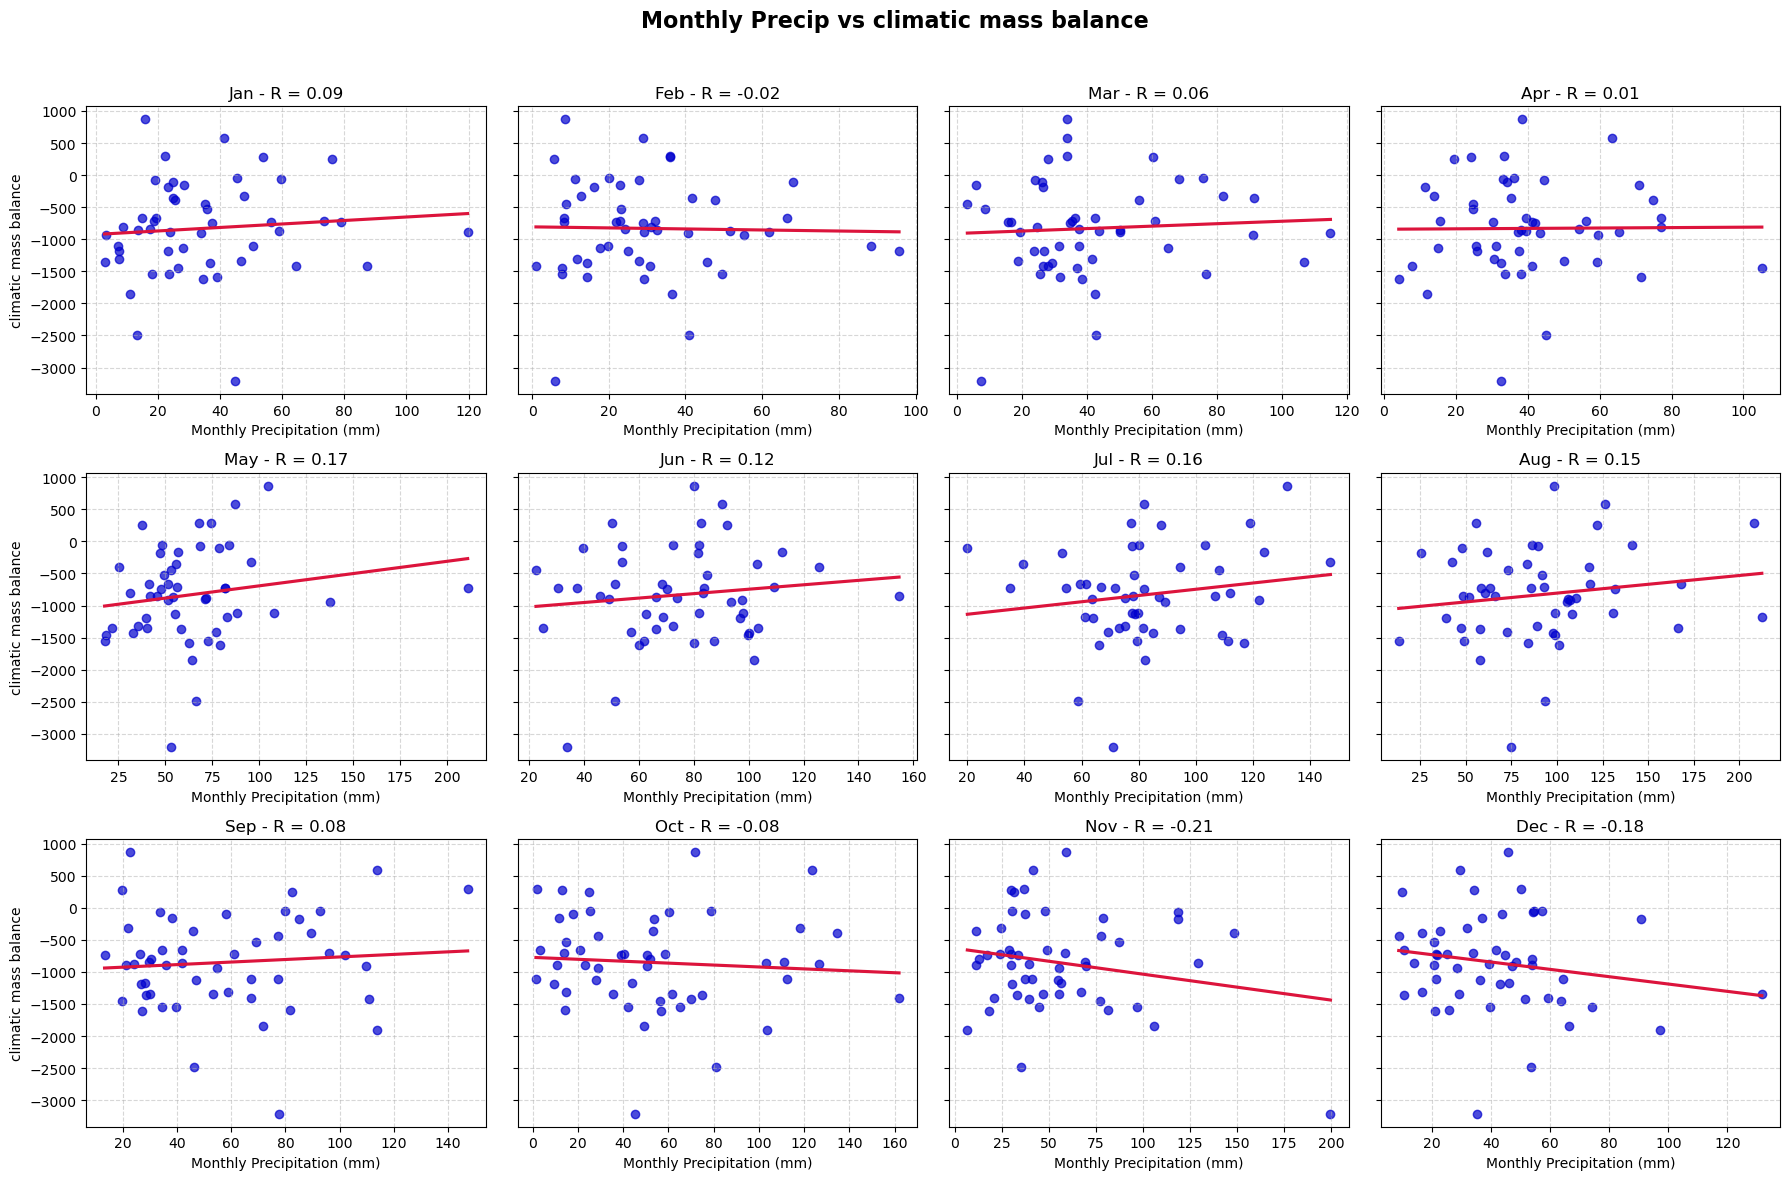

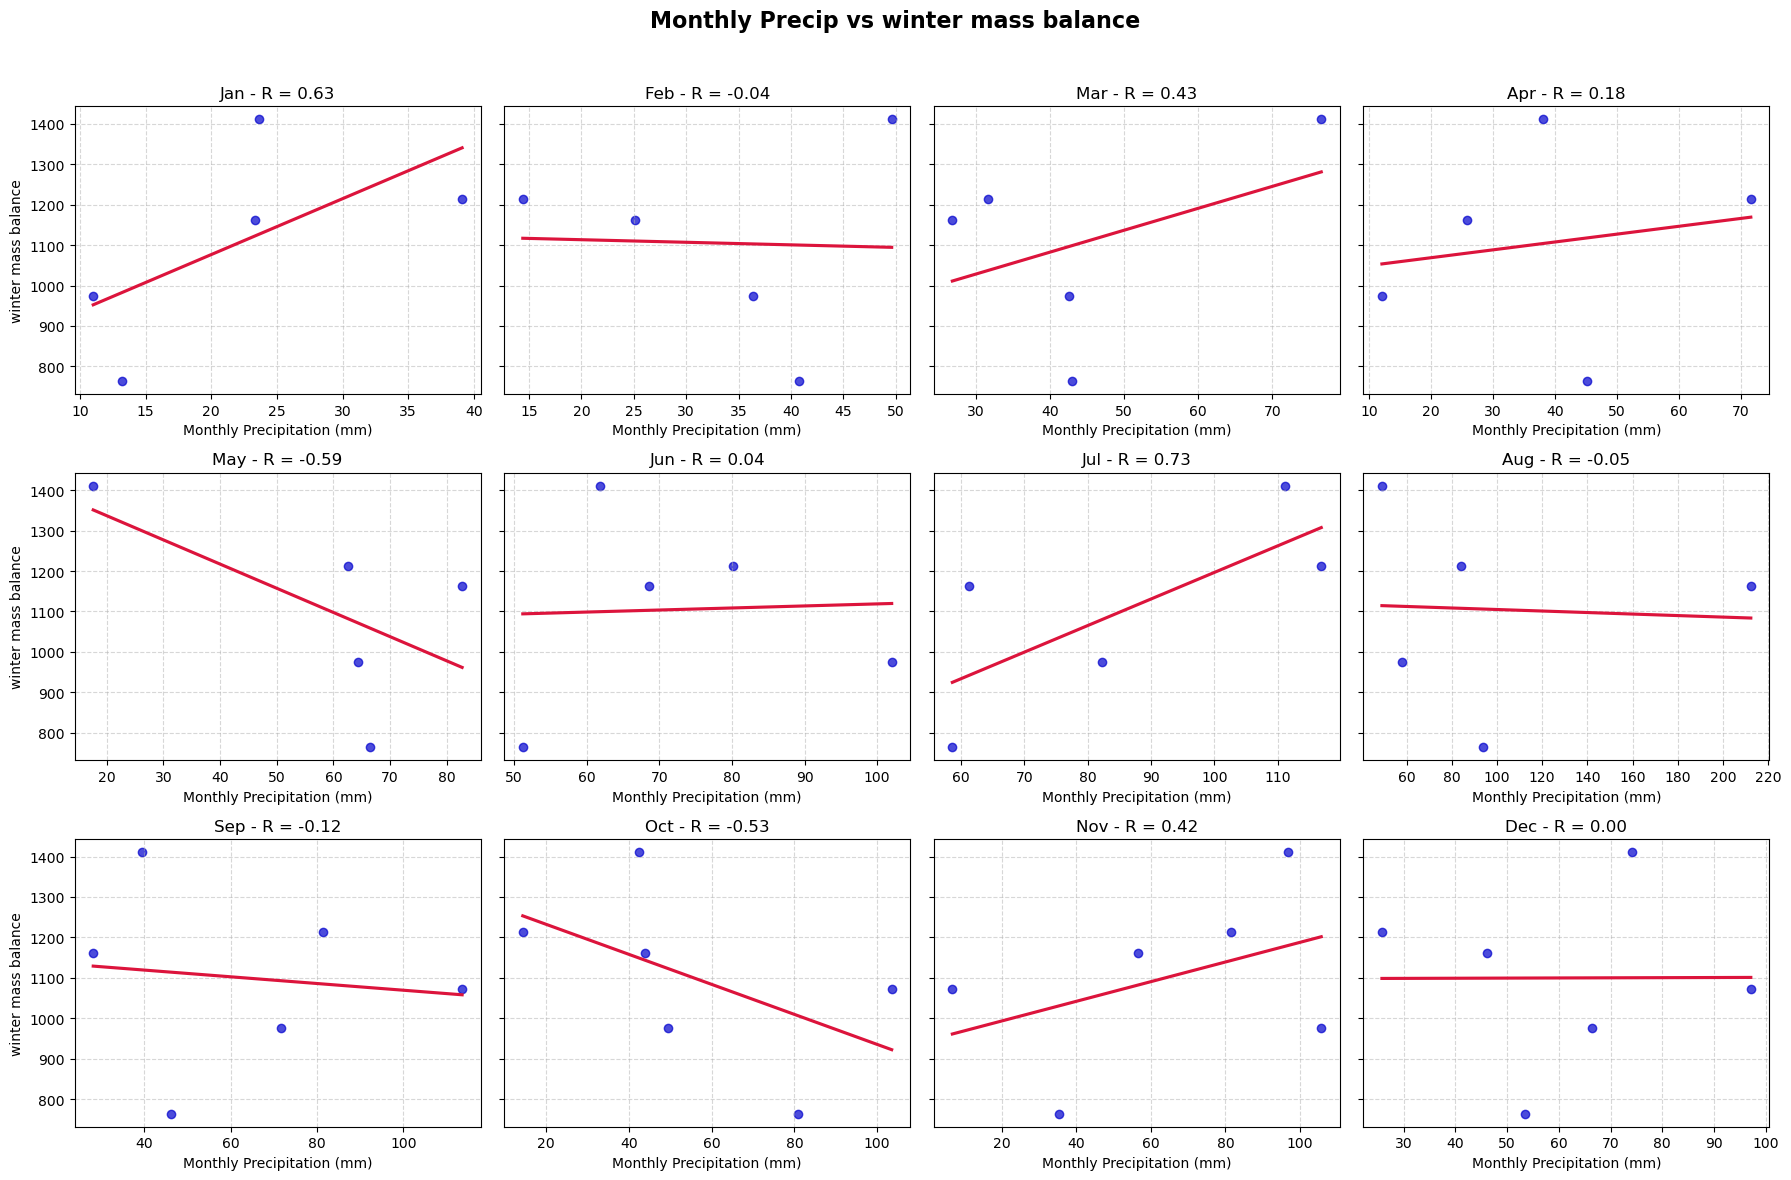

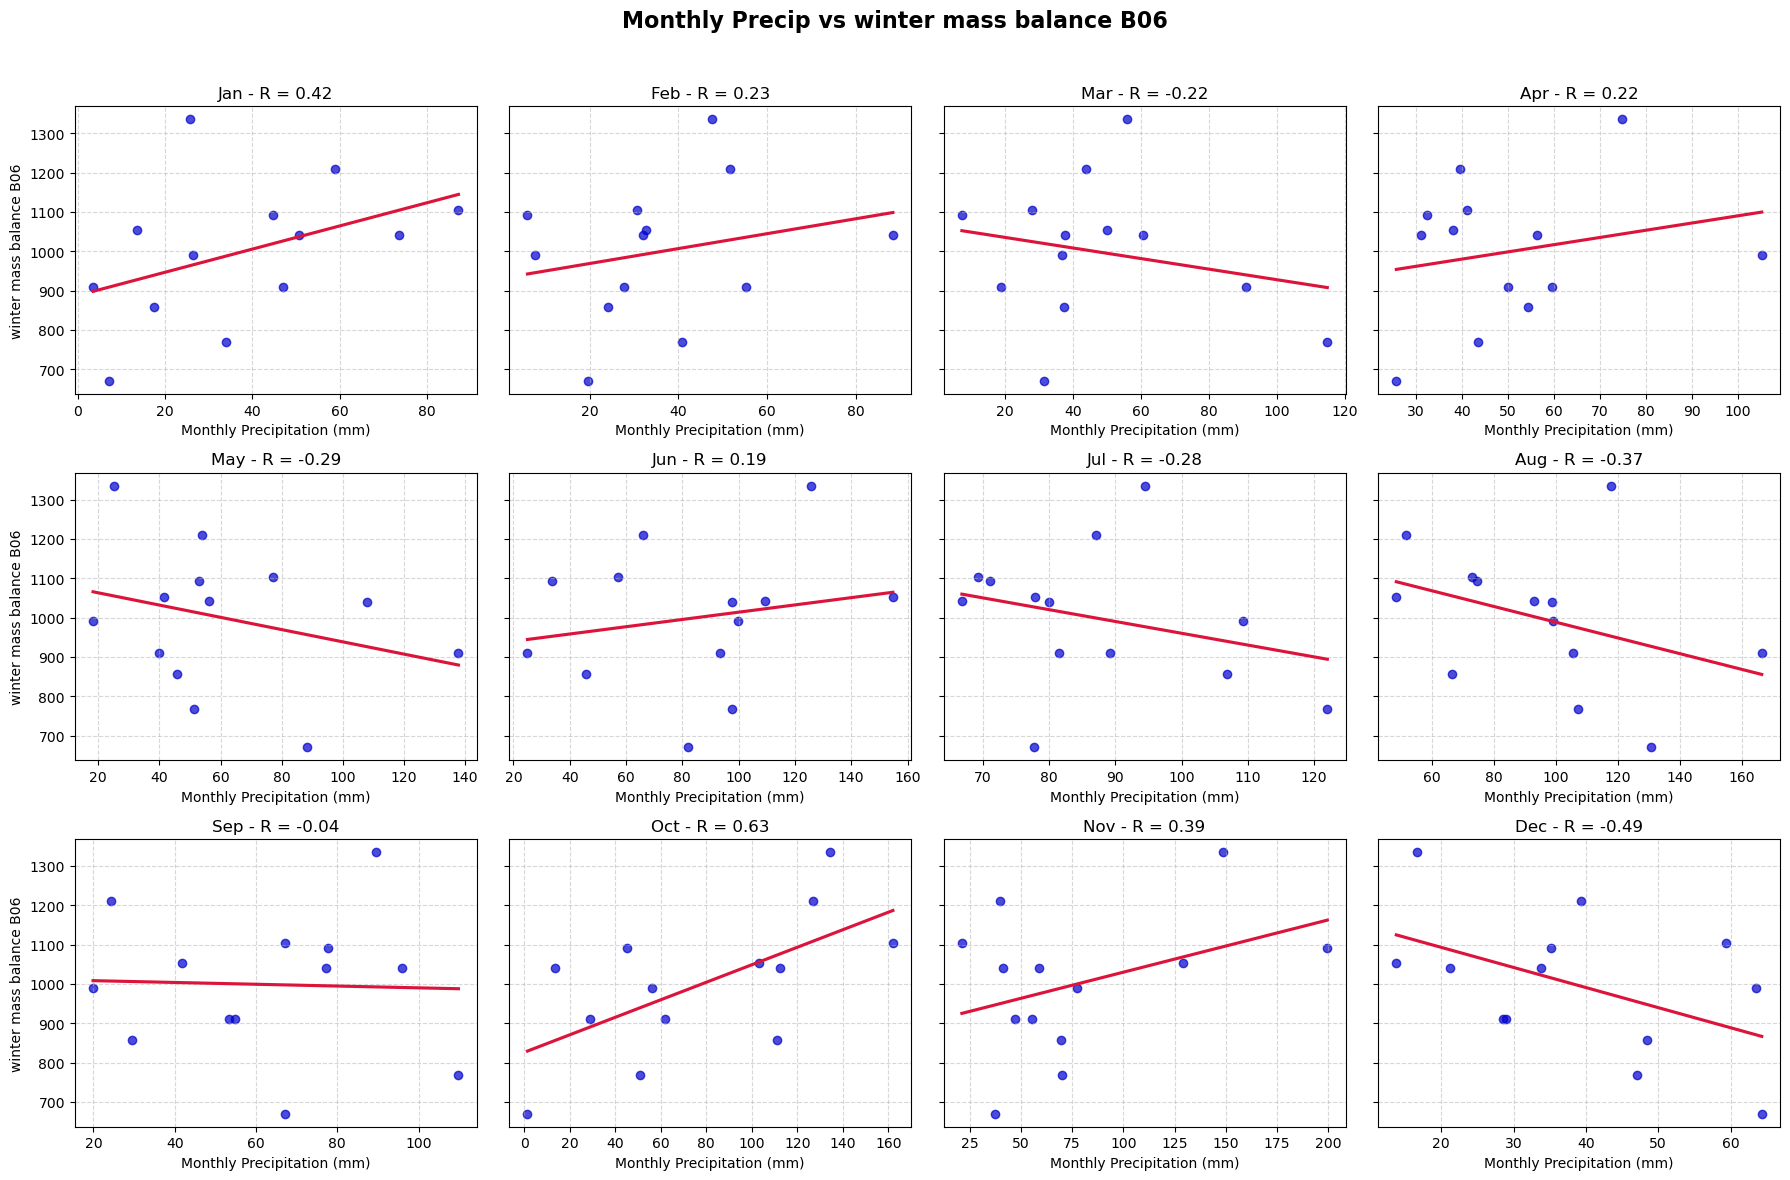

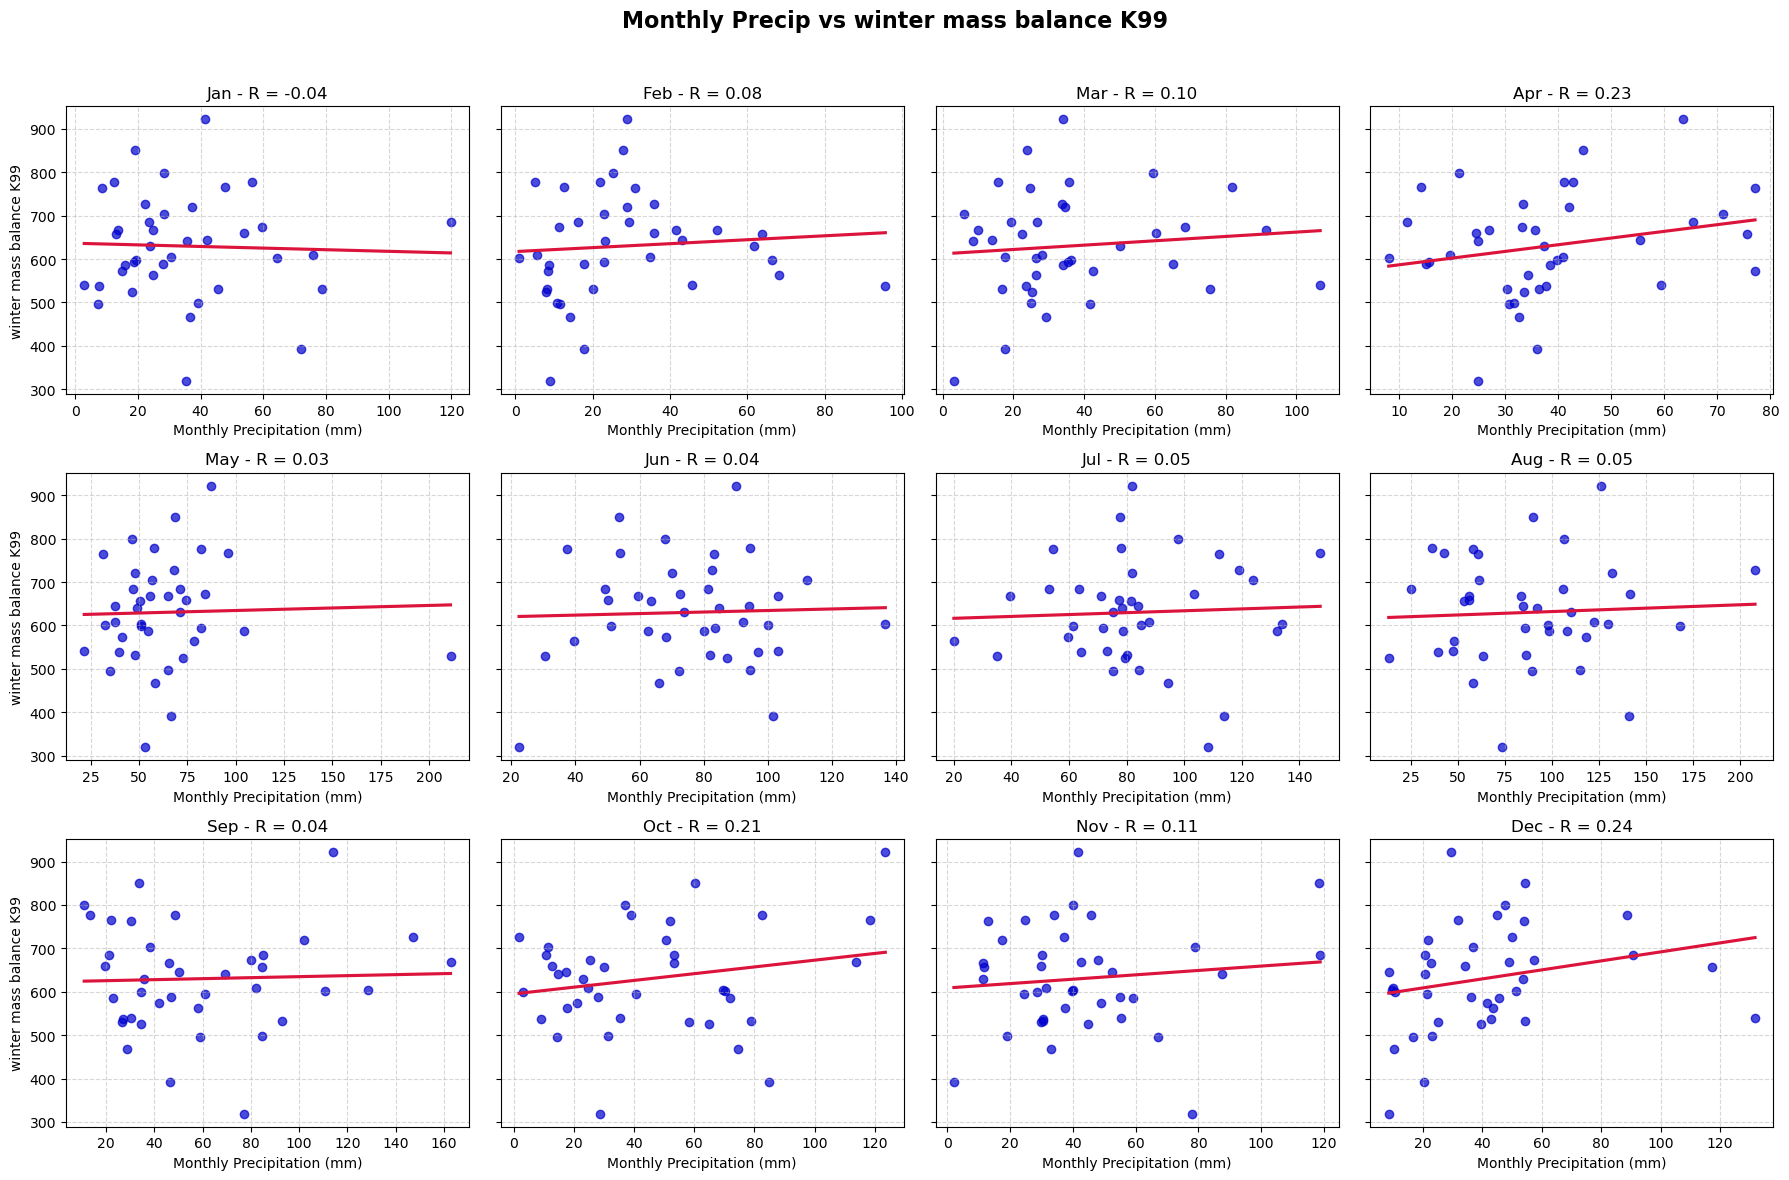

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Make sure 'year_month' is a string
monthly_merged['year_month'] = monthly_merged['year_month'].astype(str)

# Define month names for display
month_names = {
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
    '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
    '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
}

# Get unique months (e.g., '01', '02', ...)
unique_months = sorted(set(m[-2:] for m in monthly_merged['year_month']))

# List of mass balance columns
mb_cols = ['mean specific mass balance', 'climatic mass balance', 'winter mass balance', 'winter mass balance B06', 'winter mass balance K99']

# Create subplots (3 rows, 4 columns) for each MB column
for mb_col in mb_cols:
    fig, axs = plt.subplots(3, 4, figsize=(18, 12), sharey=True)
    axs = axs.flatten()

    # Iterate over each month pair (e.g., Jan and Feb)
    for i, month in enumerate(unique_months):
        # Filter data for that month
        data = monthly_merged[monthly_merged['year_month'].str.endswith(f'-{month}')]

        # Ensure the columns are numeric, and handle any non-numeric values (coerce them to NaN)
        data['precip_cleaned'] = pd.to_numeric(data['precip_cleaned'], errors='coerce')
        data[mb_col] = pd.to_numeric(data[mb_col], errors='coerce')

        # Drop rows with NaN values in either column
        data = data.dropna(subset=['precip_cleaned', mb_col])

        # Skip empty dataframes after dropping NaNs
        if data.empty:
            continue

        # Calculate the Pearson correlation coefficient (R-value)
        r_value, _ = pearsonr(data['precip_cleaned'], data[mb_col])

        # Plot with regression line
        ax = axs[i]  # Select the current subplot
        sns.regplot(
            x='precip_cleaned',
            y=mb_col,
            data=data,
            scatter_kws={'color': 'mediumblue', 'alpha': 0.7},
            line_kws={'color': 'crimson'},
            ci=None,  # Disables the confidence interval shading
            ax=ax
        )

        # Set title with month name and R-value
        ax.set_title(f'{month_names[month]} - R = {r_value:.2f}', fontsize=12)
        ax.set_xlabel('Monthly Precipitation (mm)', fontsize=10)
        ax.set_ylabel(mb_col if i % 4 == 0 else '', fontsize=10)  # Label y-axis only on the first column
        ax.grid(True, linestyle='--', alpha=0.5)  # Gridlines for better visibility

    # Set a title for the entire figure
    plt.suptitle(f"Monthly Precip vs {mb_col}", fontsize=16, fontweight='bold')

    # Improve layout and aesthetics
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the suptitle
    plt.show()


Index(['year', 'month', 'precipitation_mm', 'hydrological_year', 'latitude',
       'longitude', 'Date'],
      dtype='object')
Index(['year_month', 'precip_cleaned', 'hydrological_year', 'date',
       'mean specific mass balance', 'climatic mass balance',
       'winter mass balance', 'winter mass balance B06', 'comment B06',
       'winter mass balance K99'],
      dtype='object')


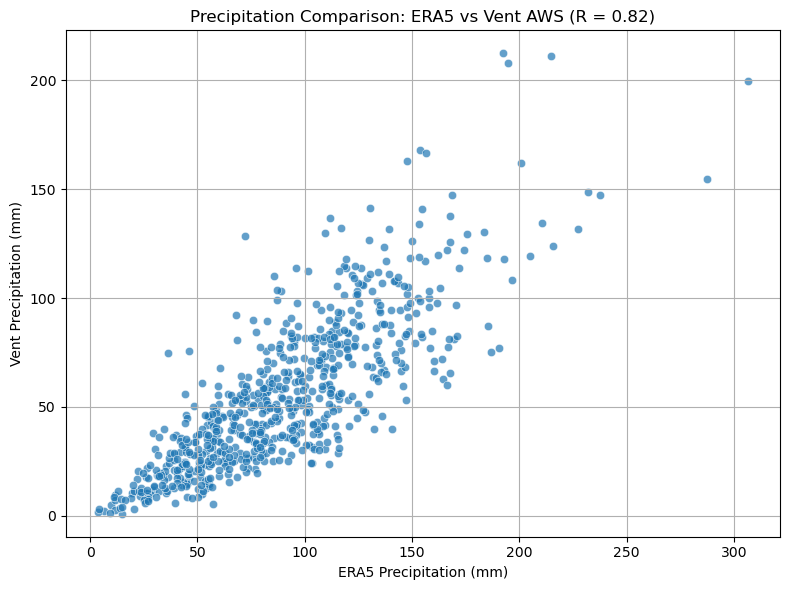

In [23]:
df_era_monthly = pd.read_pickle('era5_data/era5_monthlytotal_precipitation_1940-01-01_to_2100-12-31_lat_46.79_lng_10.74.pkl')

print(df_era_monthly.columns)

print(monthly_merged.columns)



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'month' column is formatted correctly for both dataframes
df_era_monthly['year_month'] = df_era_monthly['year'].astype(str) + '-' + df_era_monthly['month'].astype(str).str.zfill(2)
monthly_merged['year_month'] = monthly_merged['year_month'].astype(str)

# Merge data on 'year_month'
df_compare_Vent_Era5 = pd.merge(df_era_monthly, monthly_merged, on='year_month', how='inner')

# Drop rows where either precipitation column has NaN values
df_compare_Vent_Era5 = df_compare_Vent_Era5.dropna(subset=['precipitation_mm', 'precip_cleaned'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_compare_Vent_Era5, x='precipitation_mm', y='precip_cleaned', color='tab:blue', alpha=0.7)

# Add Pearson correlation coefficient to the plot
r_value, _ = pearsonr(df_compare_Vent_Era5['precipitation_mm'], df_compare_Vent_Era5['precip_cleaned'])
plt.title(f'Precipitation Comparison: ERA5 vs Vent AWS (R = {r_value:.2f})')
plt.xlabel('ERA5 Precipitation (mm)')
plt.ylabel('Vent Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df_era_monthly.head()


,year,month,precipitation_mm,hydrological_year,latitude,longitude,Date,year_month
0,1940,1,20.965576,1940.0,46.75,10.75,1940-01-01,1940-01
1,1940,2,43.271782,1940.0,46.75,10.75,1940-02-01,1940-02
2,1940,3,41.060448,1940.0,46.75,10.75,1940-03-01,1940-03
3,1940,4,70.344208,1940.0,46.75,10.75,1940-04-01,1940-04
4,1940,5,111.400368,1940.0,46.75,10.75,1940-05-01,1940-05


In [26]:
monthly_merged.head()

,year_month,precip_cleaned,hydrological_year,date,mean specific mass balance,climatic mass balance,winter mass balance,winter mass balance B06,comment B06,winter mass balance K99
0,1953-09,46.4,1954,1953-09-01,-286,NaN,NaN,NaN,NaN,392.0
1,1953-10,84.7,1954,1953-10-01,-286,NaN,NaN,NaN,NaN,392.0
2,1953-11,2.1,1954,1953-11-01,-286,NaN,NaN,NaN,NaN,392.0
3,1953-12,20.4,1954,1953-12-01,-286,NaN,NaN,NaN,NaN,392.0
4,1954-01,72.0,1954,1954-01-01,-286,NaN,NaN,NaN,NaN,392.0
